In [1]:
from typing import Tuple

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Variables como antecendentes y consecuentes
v_calidad = ctrl.Antecedent(np.arange(0, 11, 1), "calidad")
v_servicio = ctrl.Antecedent(np.arange(0, 11, 1), "servicio")
v_propina =  ctrl.Consequent(np.arange(0, 21, 1), "propina")

c:\Users\G513\University\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


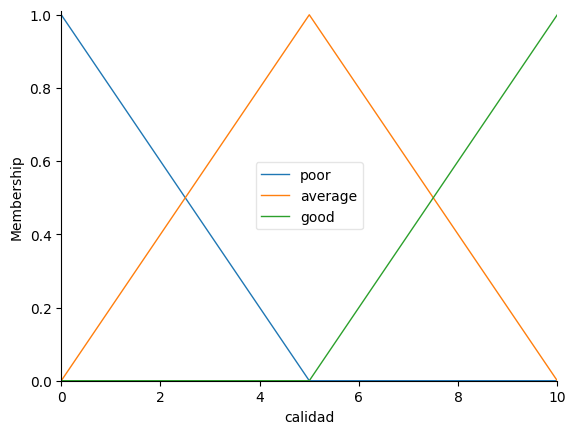

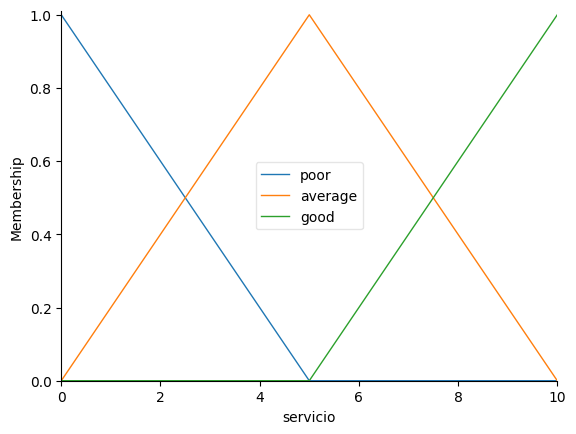

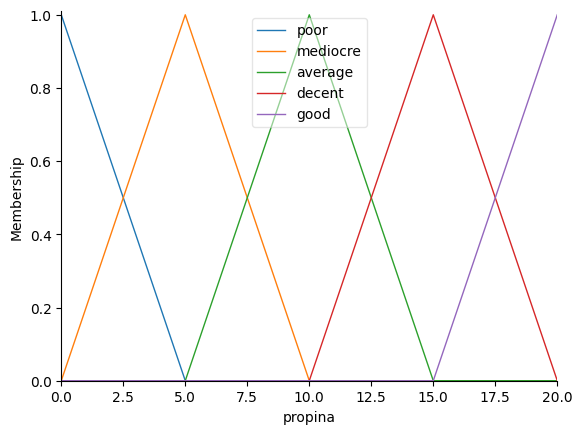

In [3]:
# Funciones de pertenencia automáticas. Se definen 3 funciones de pertenencia: pobres, medias y buenas
v_calidad.automf(3) # Cree que solo puede ser 3, 5, 7

v_calidad.view()

v_servicio.automf(3)

v_servicio.view()

v_propina.automf(5)

v_propina.view()

In [5]:
## Base de conocimiento
# | disyunción, & conjunción

# Si la calidad es pobre, entonces la propina es pobre
regla1 = ctrl.Rule(v_calidad["poor"], v_propina["poor"])

# Si la calidad pobre y el servicio es medio, entonces la propina será mediocre.
regla2 = ctrl.Rule(v_calidad["poor"] & v_servicio["average"], v_propina["mediocre"])

# Si la calidad es media y el servicio es medio, entonces la propina será media.
regla3 = ctrl.Rule(v_calidad["average"] & v_servicio["average"], v_propina["average"])

# Si la calidad es buena y el servicio es medio, entonces la propina será decente.
regla4 = ctrl.Rule(v_calidad["good"] & v_servicio["average"], v_propina["decent"])

# Si la calidad es buena y el servicio es bueno, entonces la propina será buena.
regla5 = ctrl.Rule(v_calidad["good"] & v_servicio["good"], v_propina["good"])

# Si la calidad es buena, pero el servicio es pobre, entonces la propina será mediocre.
regla6 = ctrl.Rule(v_calidad["good"] & v_servicio["poor"], v_propina["mediocre"])


In [6]:
# Creación del sistema de control
motor_de_inferencias =  ctrl.ControlSystem([
    regla1,
    regla2,
    regla3,
    regla4,
    regla5,
    regla6
])

In [7]:
def calcula_inferencia_propina(
    c: float, # los ":" es el tipo, y el "=" es el valor por defecto
    s: float, 
    mi: ctrl.ControlSystem = motor_de_inferencias
) -> Tuple[ctrl.ControlSystemSimulation, float]:
    # ControlSystemSimulation es una clase que permite simular el sistema de control difuso
    propinas_infer = ctrl.ControlSystemSimulation(mi)

    propinas_infer.input["calidad"]=c
    propinas_infer.input["servicio"]=s

    propinas_infer.compute() # Para calcular el valor de la propina

    return propinas_infer, propinas_infer.output["propina"]

In [8]:
# Simulación
calcula_inferencia_propina(c=9.5, s=5)

(<skfuzzy.control.controlsystem.ControlSystemSimulation at 0x222482029d0>,
 14.317351598173518)

Propina: 14.3174


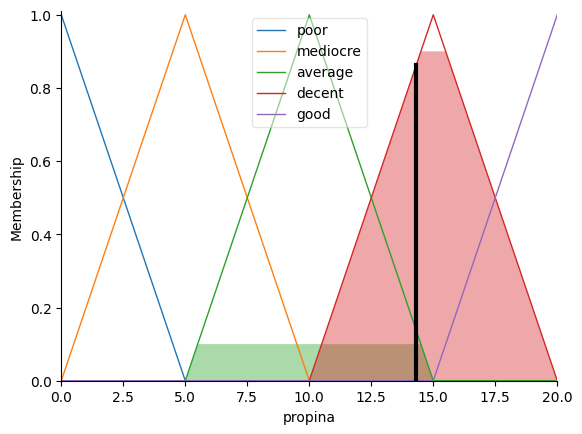

In [10]:
# Visualización
infer, propina = calcula_inferencia_propina(c=9.5, s=5)

print(f"Propina: {propina:.4f}")
v_propina.view(sim=infer)